Step#1 **Import Necessary Libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.model_selection import train_test_split
import re
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



Step#2 **Performing EDA + Load** **Data**

In [6]:
df=pd.read_csv("IMDB Dataset.csv")

In [7]:
df.shape

(50000, 2)

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<ipython-input-9-1d41f95452c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


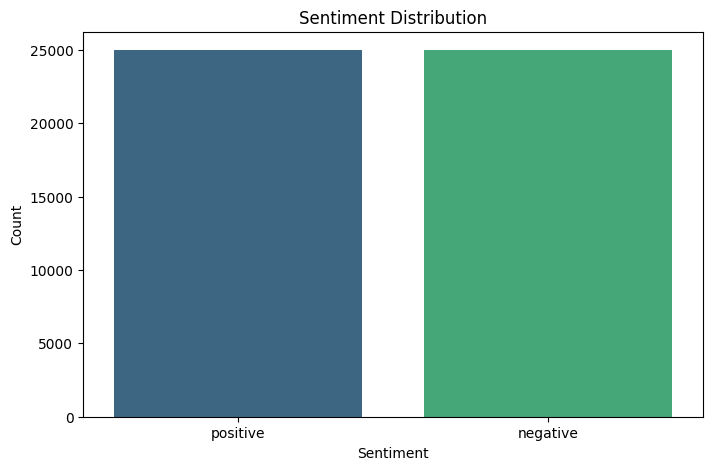

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-12-cd0f05bf4f7f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
<ipython-input-12-cd0f05bf4f7f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')


Text(0.5, 0.98, 'Average word length in each text')

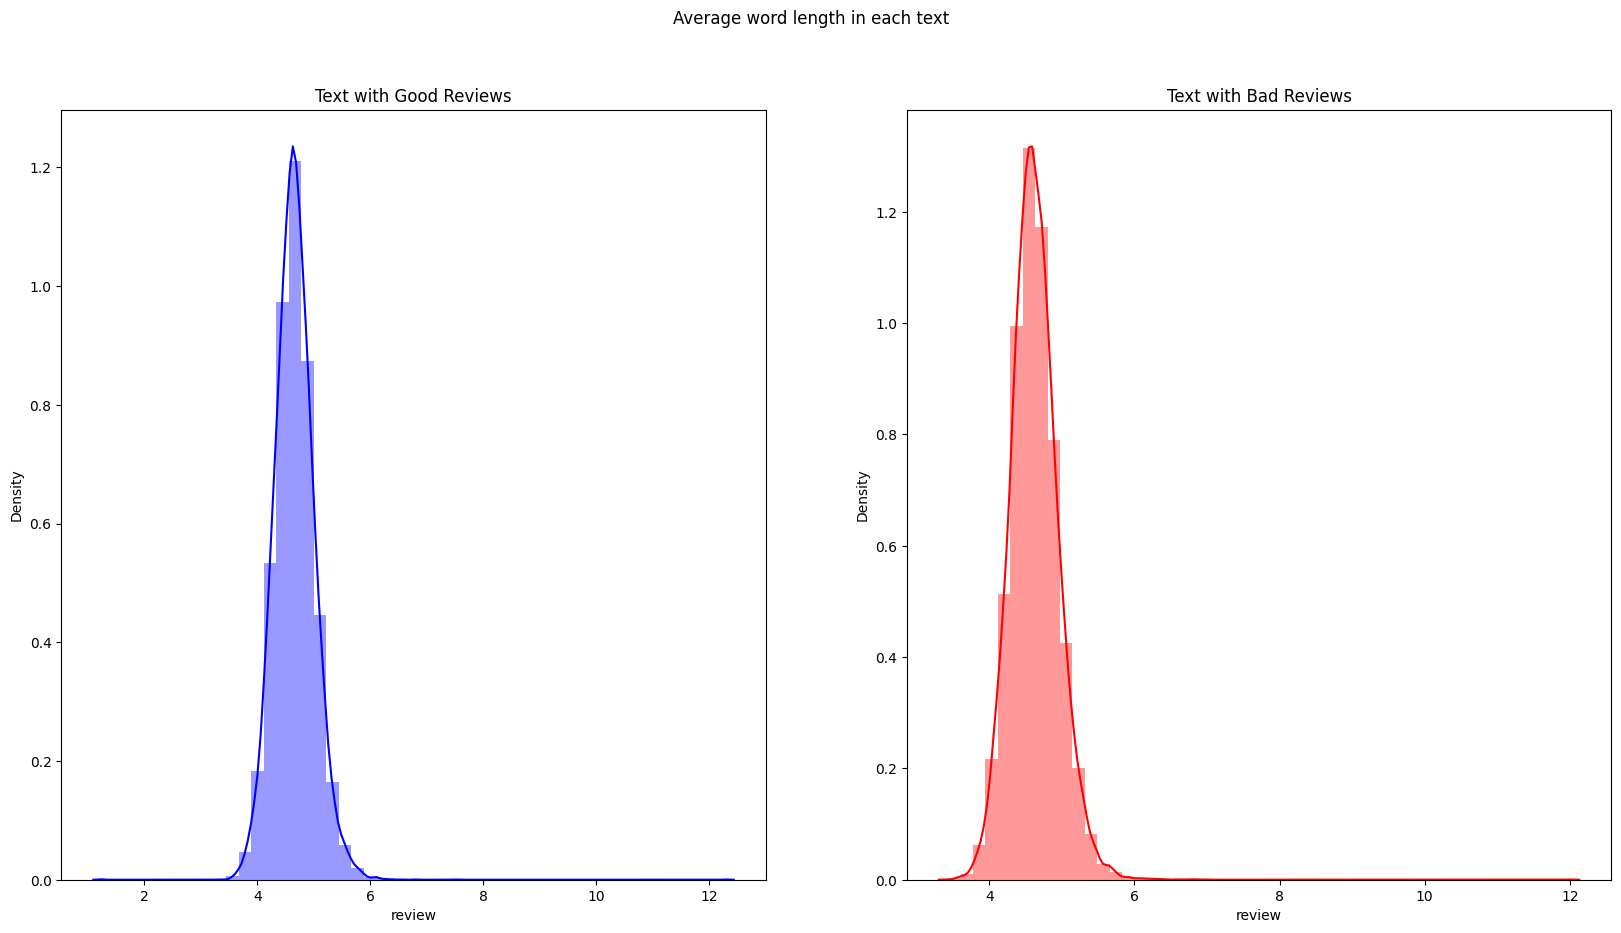

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['sentiment']=='positive']['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Text with Good Reviews')
word=df[df['sentiment']=='negative']['review'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Average word length in each text')

In [13]:
df["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [14]:
# Convert a dataset Positive and negative into 1 and 0 integer form

df.sentiment = [1 if s == 'positive' else 0 for s in df.sentiment]
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [15]:
df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [16]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [17]:
df["sentiment"].value_counts()

,count
sentiment,
1,25000
0,25000


In [18]:
# split data into training data and test data
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

Step#3 **Use Nlp Pre-Processing of Data**

In [19]:
# using stopwords from nltk

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# Remove HTML Strip and Special Characters
tag = random.randint(0, len(df)-1)
before_process = df.iloc[tag][0]

def process(a):
    a = re.sub('[,\.!?:()"]', '', a)
    a = re.sub('<.*?>', ' ', a)
    a = re.sub('http\S+', ' ', a)
    a = re.sub('[^a-zA-Z0-9]', ' ', a)
    a = re.sub('\s+', ' ', a)
    return a.lower().strip()

df['review'] = df['review'].apply(lambda a: process(a))
after_process = df.iloc[tag][0]

<ipython-input-20-a5b6be8a447d>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  before_process = df.iloc[tag][0]
<ipython-input-20-a5b6be8a447d>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  after_process = df.iloc[tag][0]


In [21]:
nltk.download('punkt_tab')
def sw_remove(a):
    words = nltk.tokenize.word_tokenize(a)
    filtered_list = [word for word in words if word not in stop_words]
    return ' '.join(filtered_list)

df['review'] = df['review'].apply(lambda a: sw_remove(a))
after_removal = sw_remove(after_process)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [23]:
def stemmer(a):
  ps=nltk.porter.PorterStemmer()
  text= ' '.join([ps.stem(word) for word in a.split()])
  return text
df['review']=df['review'].apply(stemmer)


In [24]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


In [26]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [27]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


Step# 4 **Feature Extraction**

In [28]:
norm_train_reviews=df.review[:40000]
norm_train_reviews[0]
norm_test_reviews=df.review[40000:]
norm_test_reviews[45005]


'read review watch piec cinemat garbag took least 2 page find somebodi els think appallingli unfunni montag acm humour 70 inde era least funni set sketch comedi ever seen till come along half skit alreadi done infinit better act monti python woodi allen say nice piec anim last 90 second highlight film would still get close sum mindless drivel ridden wast 75 minut semin comedi world semin realli mean semen scatolog humour world scat actual fece precursor joke mean handbook comedi tit bum odd beaver niceif pubesc boy least one hand free found playboy exist give break earli 70 way sketch comedi go back least ten year prior way could even forgiv film even made gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 lower scoreand recommend insomniac coma patientsor perhap peopl suffer lockjawtheir jaw would final drop open disbelief'

In [29]:
cv=CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews = cv.fit_transform(norm_train_reviews[:40000])  # Process only 40000 reviews
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6605910)
BOW_cv_test: (10000, 6605910)


In [30]:
tv=TfidfVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews = tv.fit_transform(norm_train_reviews[:40000])  # Process only 40000 reviews
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)

print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6605910)
Tfidf_test: (10000, 6605910)


In [31]:
lb=LabelBinarizer() #converts your text-based sentiment labels into a numerical format
sentimentdata=lb.fit_transform(df['sentiment'])
print(sentimentdata.shape)

(50000, 1)


In [32]:
train_sentiment=sentimentdata[:40000]
test_sentiment=sentimentdata[40000:]
print(train_sentiment)
print(test_sentiment)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


**Apply Machine learning Model**(Logistic Regression)

In [33]:
lr = LogisticRegression(penalty='l2', max_iter=1000, C=1, random_state=42)  # Increased max_iter
lr_bow = lr.fit(cv_train_reviews, train_sentiment)
lr_tfidf=lr.fit(tv_train_reviews,train_sentiment)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
print("Bag of Words :",lr_bow)
print("Tfidf :",lr_tfidf)

Bag of Words : LogisticRegression(C=1, max_iter=1000, random_state=42)
Tfidf : LogisticRegression(C=1, max_iter=1000, random_state=42)


In [36]:
# Bag of words Prediction
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
# Tfidf Prediction
lr_tfidf_predict=lr.predict(cv_test_reviews)

[0 0 0 ... 1 0 0]


Check Accuracy:

In [37]:
lr_bow_accuracy=accuracy_score(test_sentiment,lr_bow_predict)
print("Accuracy of BOW: ",lr_bow_accuracy)
# Tfidf Accuracy
lr_tfidf_accuracy=accuracy_score(test_sentiment,lr_tfidf_predict)
print("Accuracy of Tfidf: ",lr_tfidf_accuracy)

Accuracy of BOW:  0.8612
Accuracy of Tfidf:  0.8612


In [38]:
# Classification Report of BOW
lr_bow_report=classification_report(test_sentiment,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)
# Classification Report of Tfidf
lr_tfidf_report=classification_report(test_sentiment,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.85      0.87      0.86      4993
    Negative       0.87      0.85      0.86      5007

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

              precision    recall  f1-score   support

    Positive       0.85      0.87      0.86      4993
    Negative       0.87      0.85      0.86      5007

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [39]:
# Confusion Matrix of BOW
bow_conf=confusion_matrix(test_sentiment,lr_bow_predict)
print("Confusion Matrix BOW: ",bow_conf)

# Confusion Matrix of Tfidf
tfidf_conf=confusion_matrix(test_sentiment,lr_tfidf_predict)
print("Confusion Matrix Tfidf: ",tfidf_conf)

Confusion Matrix BOW:  [[4357  636]
 [ 752 4255]]
Confusion Matrix Tfidf:  [[4357  636]
 [ 752 4255]]


**Apply Machine learning model**
 (Multinomial NAive Bayes)

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

# Load the IMDB dataset
df = pd.read_csv("IMDB Dataset.csv")

# Preprocess the data
df["Category"] = df.sentiment.apply(lambda x: 1 if x == "positive" else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["review"], df['Category'], test_size=0.2, random_state=42)

# Machine Learning Model: Multinomial Naive Bayes
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
y_pred_nb = nb_model.predict(X_test_vectorized)

# Evaluate the Naive Bayes model
print("Naive Bayes Classifier Results:")
print(classification_report(y_test, y_pred_nb))



Naive Bayes Classifier Results:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4961
           1       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [41]:
multinv=MultinomialNB()
# For BOW
multinv_bow=multinv.fit(cv_train_reviews,train_sentiment)
print(multinv_bow)
# For Tfidf
multinv_tfidf=multinv.fit(tv_train_reviews,train_sentiment)
print(multinv_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


In [42]:
# Bag of words Prediction
multinv_bow_predict=multinv.predict(cv_test_reviews)
print(multinv_bow_predict)
# Tfidf Prediction
multinv_tfidf_predict=multinv.predict(cv_test_reviews)
print(multinv_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [43]:
# Bag of Words Accuracy
multinv_bow_accuracy=accuracy_score(test_sentiment,multinv_bow_predict)
print("Accuracy of BOW: ",multinv_bow_accuracy)
# Tfidf Accuracy
multinv_tfidf_accuracy=accuracy_score(test_sentiment,multinv_tfidf_predict)
print("Accuracy of Tfidf: ",multinv_tfidf_accuracy)

Accuracy of BOW:  0.8815
Accuracy of Tfidf:  0.8815


In [44]:
# Classification Report of BOW
multinv_bow_report=classification_report(test_sentiment,multinv_bow_predict,target_names=['Positive','Negative'])
print(multinv_bow_report)
# Classification Report of Tfidf
multinv_tfidf_report=classification_report(test_sentiment,multinv_tfidf_predict,target_names=['Positive','Negative'])
print(multinv_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.87      0.90      0.88      4993
    Negative       0.89      0.87      0.88      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

    Positive       0.87      0.90      0.88      4993
    Negative       0.89      0.87      0.88      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [46]:
# Confusion Matrix of BOW
bow_conf=confusion_matrix(test_sentiment,multinv_bow_predict)
print("Confusion Matrix BOW: ",bow_conf)

# Confusion Matrix of Tfidf
tfidf_conf=confusion_matrix(test_sentiment,multinv_tfidf_predict)
print("Confusion Matrix Tfidf: ",tfidf_conf)

Confusion Matrix BOW:  [[4480  513]
 [ 672 4335]]
Confusion Matrix Tfidf:  [[4480  513]
 [ 672 4335]]


Accuracy

In [47]:
# Calculate F1 Score and Accuracy for Naive Bayes
f1_nb = f1_score(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes F1 Score: {f1_nb}")
print(f"Naive Bayes Accuracy: {accuracy_nb}")

Naive Bayes F1 Score: 0.8451771451976244
Naive Bayes Accuracy: 0.8488


**Apply Deep Learning**(LSTM)

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load the IMDB dataset
df = pd.read_csv("IMDB Dataset.csv")

# Preprocess the data
df["Category"] = df.sentiment.apply(lambda x: 1 if x == "positive" else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["review"], df['Category'], test_size=0.2, random_state=42)

# Text Vectorization
max_words = 10000  # Maximum number of words to consider
max_len = 150      # Maximum length of each review

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report
print("LSTM Classifier Results:")
print(classification_report(y_test, y_pred))

# Calculate F1 Score and Accuracy
f1_lstm = f1_score(y_test, y_pred)
accuracy_lstm = accuracy_score(y_test, y_pred)
print(f"LSTM F1 Score: {f1_lstm}")
print(f"LSTM Accuracy: {accuracy_lstm}")

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.7499 - loss: 0.4835 - val_accuracy: 0.8658 - val_loss: 0.3222
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9008 - loss: 0.2527 - val_accuracy: 0.8712 - val_loss: 0.3007
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9340 - loss: 0.1792 - val_accuracy: 0.8714 - val_loss: 0.3675
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9567 - loss: 0.1259 - val_accuracy: 0.8665 - val_loss: 0.3828
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9689 - loss: 0.0926 - val_accuracy: 0.8683 - val_loss: 0.3946
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
LSTM Classifier Results:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4961
           1       0.89      0.85      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      

**Topic Modeling using LDA**

In [50]:
import nltk
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")

def stem(text):
    return stemmer.stem(text)

In [51]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS as stopwords

#print(stopwords)

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text, min_len=4):
        if token not in stopwords: #and len(token) > 3:
            result.append(stem(token))
    return result

In [52]:
x=df['review']
processed_docs = []
for i in range(0, len(x)):
    processed_docs.append(preprocess(x[i]))

print(len(processed_docs))

dictionary = gensim.corpora.Dictionary(processed_docs)
print(len(dictionary))

index = 0
for key, value in dictionary.iteritems():
    print(key, value)
    index += 1
    if index > 9:
        break

50000
66065
0 accustom
1 agenda
2 agreement
3 appeal
4 aryan
5 audienc
6 away
7 bitch
8 brutal
9 call


In [53]:
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)
print(len(dictionary))

16376


In [54]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 2),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 2),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 3),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 2),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 2),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 2),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 3),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 2),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 2),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),

In [55]:
# Create the dictionary
id2word = dictionary

# Create the corpus with word frequencies
corpus = bow_corpus

# Build the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)


for index, topic in lda_model.print_topics(-1):
    print(f"Topic: {index} \nWords: {topic}")

Topic: 0 
Words: 0.018*"charact" + 0.015*"stori" + 0.009*"scene" + 0.008*"work" + 0.008*"time" + 0.007*"great" + 0.006*"plot" + 0.006*"good" + 0.006*"director" + 0.006*"perform"
Topic: 1 
Words: 0.022*"like" + 0.016*"watch" + 0.013*"time" + 0.013*"good" + 0.011*"act" + 0.010*"look" + 0.009*"think" + 0.009*"thing" + 0.009*"charact" + 0.009*"plot"
Topic: 2 
Words: 0.052*"comedi" + 0.039*"funni" + 0.037*"music" + 0.031*"song" + 0.021*"laugh" + 0.019*"danc" + 0.015*"joke" + 0.015*"anim" + 0.014*"sing" + 0.013*"humor"
Topic: 3 
Words: 0.015*"play" + 0.012*"role" + 0.011*"perform" + 0.009*"star" + 0.009*"best" + 0.008*"great" + 0.008*"actor" + 0.008*"cast" + 0.007*"year" + 0.006*"john"
Topic: 4 
Words: 0.014*"love" + 0.011*"play" + 0.011*"girl" + 0.009*"young" + 0.008*"wife" + 0.008*"father" + 0.008*"famili" + 0.008*"woman" + 0.007*"friend" + 0.007*"life"
Topic: 5 
Words: 0.033*"horror" + 0.014*"kill" + 0.010*"scene" + 0.010*"killer" + 0.009*"like" + 0.009*"blood" + 0.008*"look" + 0.008*"zom